In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

In [2]:
# Load dataset
file_path = r"C:\Users\Naufal\OneDrive\MyDocuments\KULIAH\Tugas Kuliah\TUGAS AKHIR\dataset\dataset hsv\numbered_gabah_features_completed.xlsx"
df = pd.read_excel(file_path)

In [3]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['quality'])
y = df['quality']

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Definisi SVM dengan pipeline scaling ---
svm_model = make_pipeline(MinMaxScaler(), SVC(kernel='linear', probability=True, random_state=42))

# --- Pelatihan model terbaik pada data train ---
svm_model.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svc',
                 SVC(kernel='linear', probability=True, random_state=42))])

In [4]:
# --- Evaluasi pada Data Latih ---
y_train_pred = svm_model.predict(X_train)

# Untuk klasifikasi biner, gunakan average='macro'. Jika multiclass, gunakan 'macro' atau 'weighted'
# Pastikan jenis target anda sesuai (biner atau multiclass)
train_precision = precision_score(y_train, y_train_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1 = f1_score(y_train, y_train_pred, average='macro')
train_accuracy = accuracy_score(y_train, y_train_pred)

print("=== Evaluation Metrics on Training Data ===")
print(f"Accuracy  : {train_accuracy:.4f}")
print(f"Precision : {train_precision:.4f}")
print(f"Recall    : {train_recall:.4f}")
print(f"F1 Score  : {train_f1:.4f}")

print("\n\n=== Classification Report on Train Data ===")
print(classification_report(y_train, y_train_pred))

train_cm = confusion_matrix(y_train, y_train_pred)
print("\n\n=== Confusion Matrix on Training Data ===")
print(train_cm)

# --- Evaluasi pada Data Uji ---
y_pred = svm_model.predict(X_test)

# Untuk klasifikasi biner, gunakan average='macro'. Jika multiclass, gunakan 'macro' atau 'weighted'
test_precision = precision_score(y_test, y_pred, average='macro')
test_recall = recall_score(y_test, y_pred, average='macro')
test_f1 = f1_score(y_test, y_pred, average='macro')
test_accuracy = accuracy_score(y_test, y_pred)

print("\n\n=== Evaluation Metrics on Test Data ===")
print(f"Accuracy  : {test_accuracy:.4f}")
print(f"Precision : {test_precision:.4f}")
print(f"Recall    : {test_recall:.4f}")
print(f"F1 Score  : {test_f1:.4f}")

print("\n\n=== Classification Report on Test Data ===")
print(classification_report(y_test, y_pred))

test_cm = confusion_matrix(y_test, y_pred)
print("\n\n=== Confusion Matrix on Test Data ===")
print(test_cm)

=== Evaluation Metrics on Training Data ===
Accuracy  : 0.9721
Precision : 0.9720
Recall    : 0.9719
F1 Score  : 0.9719


=== Classification Report on Train Data ===
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       609
           1       0.97      0.98      0.98       623
           2       0.96      0.95      0.96       596

    accuracy                           0.97      1828
   macro avg       0.97      0.97      0.97      1828
weighted avg       0.97      0.97      0.97      1828



=== Confusion Matrix on Training Data ===
[[597   0  12]
 [  0 613  10]
 [ 11  18 567]]


=== Evaluation Metrics on Test Data ===
Accuracy  : 0.9716
Precision : 0.9712
Recall    : 0.9733
F1 Score  : 0.9721


=== Classification Report on Test Data ===
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       152
           1       0.96      0.99      0.98       136
           2       0.98      0.95    

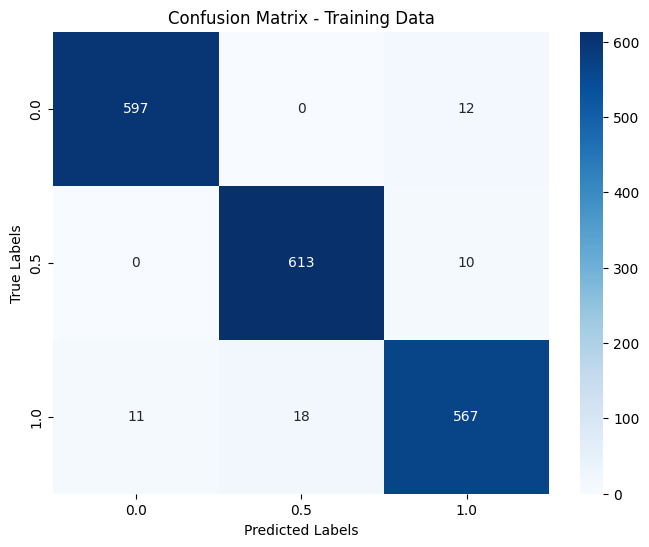



Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       609
           1       0.97      0.98      0.98       623
           2       0.96      0.95      0.96       596

    accuracy                           0.97      1828
   macro avg       0.97      0.97      0.97      1828
weighted avg       0.97      0.97      0.97      1828



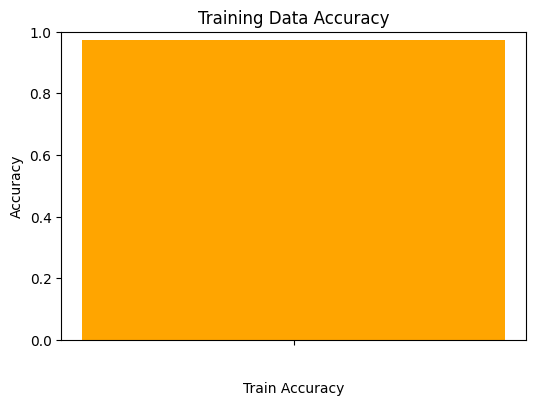

In [5]:
# Plotting Confusion Matrix for Training Data
conf_matriX_train_reshaped = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matriX_train_reshaped, annot=True, fmt="d", cmap="Blues", xticklabels=['0.0', '0.5', '1.0'], yticklabels=['0.0', '0.5', '1.0'])
plt.title("Confusion Matrix - Training Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plotting Classification Report for Training Data
print("\n\nClassification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

# Plotting Accuracy for Training Data
accuracy_train = accuracy_score(y_train, y_train_pred)
plt.figure(figsize=(6, 4))
plt.bar(["\n\nTrain Accuracy"], [accuracy_train], color='orange')
plt.ylim(0, 1)
plt.title("Training Data Accuracy")
plt.ylabel("Accuracy")
plt.show()

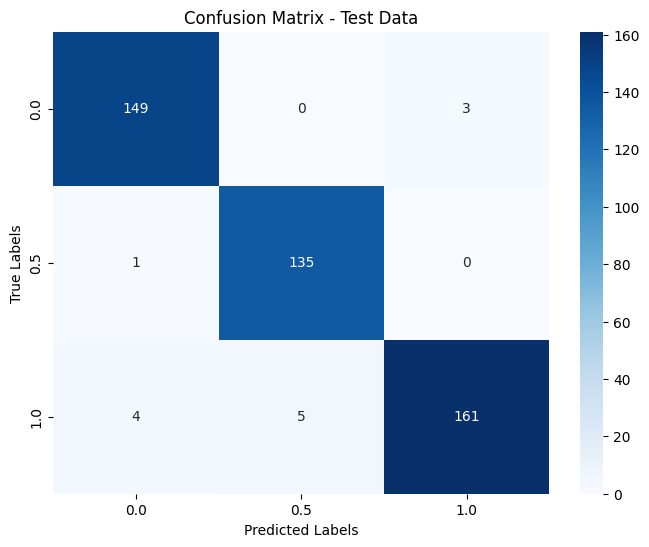



Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       152
           1       0.96      0.99      0.98       136
           2       0.98      0.95      0.96       170

    accuracy                           0.97       458
   macro avg       0.97      0.97      0.97       458
weighted avg       0.97      0.97      0.97       458



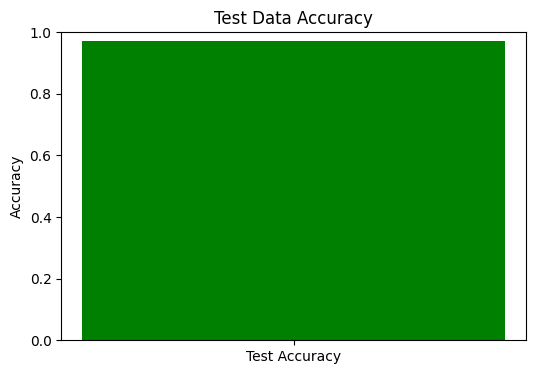

In [6]:
# ----- Visualization for Evaluation using plt and seaborn -----

# Plotting Confusion Matrix for Test Data
conf_matrix_test = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=['0.0', '0.5', '1.0'], yticklabels=['0.0', '0.5', '1.0'])
plt.title("Confusion Matrix - Test Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plotting Classification Report for Test Data
print("\n\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred))

# Plotting Accuracy for Test Data
accuracy_test = accuracy_score(y_test, y_pred)
plt.figure(figsize=(6, 4))
plt.bar(["Test Accuracy"], [accuracy_test], color='green')
plt.ylim(0, 1)
plt.title("Test Data Accuracy")
plt.ylabel("Accuracy")
plt.show()